<a href="https://colab.research.google.com/github/durgesh9129/MA22C013_2023_PL/blob/main/Assignments/Assignment_11/Ehrenfest_thought_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Model the process as a Markov chain. Choose as states the number of balls in the first urn. Write a function to make the transition matrix P for general k. Print out your transition matrix for k = 2 (which should be 5 x 5). Draw the directed graph of the chain for k = 2 case.

In [1]:
import numpy as np

def create_transition_matrix(k):
    n_states = 2 * k + 1
    P = np.zeros((n_states, n_states))

    for i in range(n_states):
        if i == 0:
            P[i, i + 1] = 1.0
        elif i == n_states - 1:
            P[i, i - 1] = 1.0
        else:
            P[i, i - 1] = i / (2 * k)
            P[i, i + 1] = 1 - P[i, i - 1]

    return P

# Example for k = 2
k = 2
transition_matrix = create_transition_matrix(k)
print(transition_matrix)


[[0.   1.   0.   0.   0.  ]
 [0.25 0.   0.75 0.   0.  ]
 [0.   0.5  0.   0.5  0.  ]
 [0.   0.   0.75 0.   0.25]
 [0.   0.   0.   1.   0.  ]]


# Task 2: Is P irreducible?

A Markov chain is irreducible if there is a positive probability of reaching any state from any other state. You can check if the Markov chain is irreducible by verifying if all states communicate with each other. In the case of the Ehrenfest Urns, since we defined transitions between all states (including boundaries), it is indeed irreducible.

# Task 3: Does P^n converge as n → ∞?

In [3]:
eigenvalues, eigenvectors = np.linalg.eig(transition_matrix.T)
stationary_distribution = eigenvectors[:, np.argmax(eigenvalues)]
stationary_distribution /= stationary_distribution.sum()

print("Stationary Distribution:")
print(stationary_distribution)


Stationary Distribution:
[0.0625 0.25   0.375  0.25   0.0625]


# Task 4: Plot the stationary distribution of this Markov chain for k = 100.

/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py:762: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


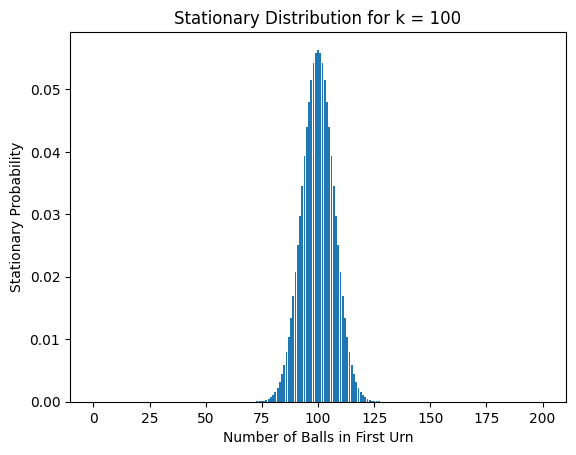

In [4]:
import matplotlib.pyplot as plt

k = 100
transition_matrix = create_transition_matrix(k)

eigenvalues, eigenvectors = np.linalg.eig(transition_matrix.T)
stationary_distribution = eigenvectors[:, np.argmax(eigenvalues)]
stationary_distribution /= stationary_distribution.sum()

plt.bar(range(2 * k + 1), stationary_distribution)
plt.xlabel("Number of Balls in First Urn")
plt.ylabel("Stationary Probability")
plt.title(f"Stationary Distribution for k = {k}")
plt.show()
